In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

In [4]:
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [5]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [6]:
df['horsepower'].fillna(df['horsepower'].mean() , inplace = True )

In [7]:
df.isnull().sum()  

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df = df.rename(columns = {'mpg' : 'pers per gallon ' } )

In [9]:
df

,name,pers per gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [10]:
top_10_name = df['name'].value_counts().reset_index().head(10)



df.isnull().sum()   بتجيب عدد تكرار الاسم في الداتا سيت بعدين تجبلي التوب تين منهم و بتعمل ريسيت للاندكسات من صفر لتسعه عشان ده مش الاندكس الصلي بتاعهم 

In [11]:
top_10_name

,name,count
0,ford pinto,6
1,toyota corolla,5
2,amc matador,5
3,ford maverick,5
4,chevrolet chevette,4
5,amc gremlin,4
6,chevrolet impala,4
7,peugeot 504,4
8,amc hornet,4
9,toyota corona,4


Text(0.5, 1.0, 'top 10 car name and thier count ')

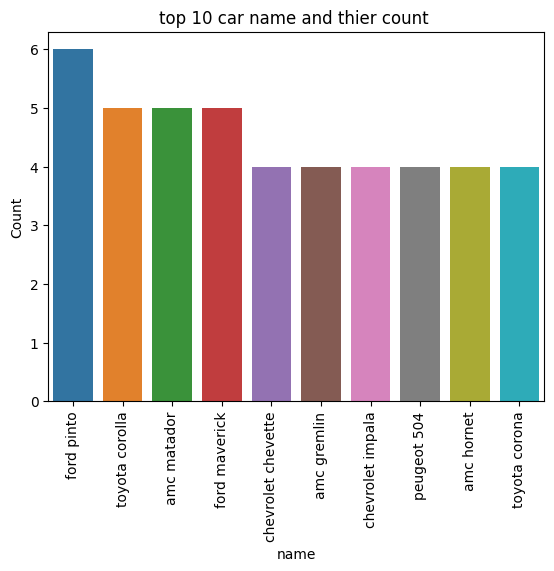

In [12]:
sns.barplot(data= top_10_name , x ='name' , y='count')
plt.xlabel('name')
plt.ylabel('Count')
plt.xticks(rotation = 90 )
plt.title('top 10 car name and thier count ')

In [13]:
top_10_horsepower=df['horsepower'].value_counts().reset_index().head(10)

In [14]:
top_10_horsepower

,horsepower,count
0,150.0,22
1,90.0,20
2,88.0,19
3,110.0,18
4,100.0,17
5,75.0,14
6,95.0,14
7,105.0,12
8,70.0,12
9,67.0,12


Text(0.5, 1.0, 'top 10 car horsepower and thier count ')

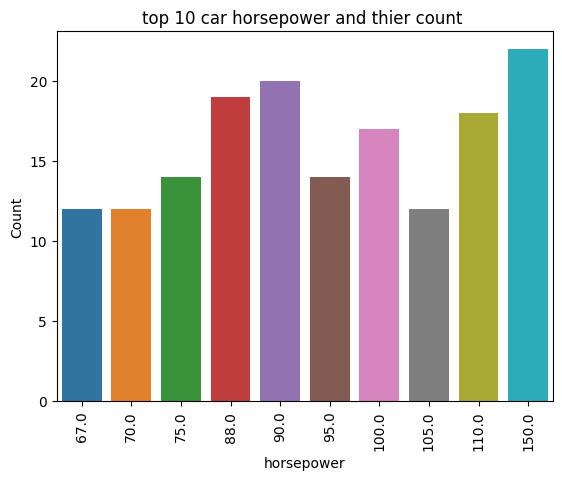

In [15]:
sns.barplot(data= top_10_horsepower , x ='horsepower' , y='count')
plt.xlabel('horsepower')
plt.ylabel('Count')
plt.xticks(rotation = 90 )
plt.title('top 10 car horsepower and thier count ')

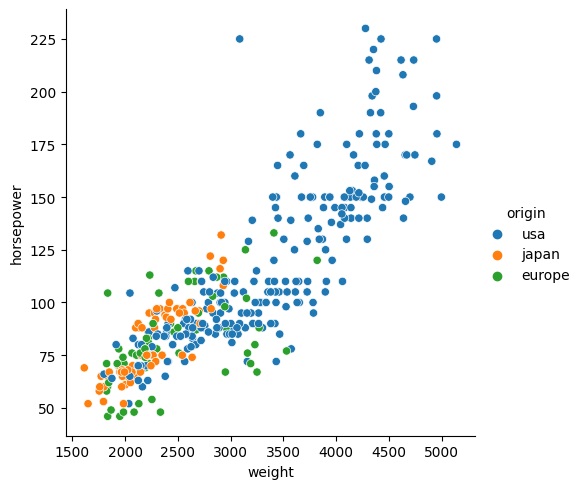

In [16]:
sns.relplot(data = df , x = 'weight' , y = 'horsepower' , hue = 'origin' )

In [17]:
A = df.origin.value_counts()

In [18]:
A

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

<Axes: ylabel='count'>

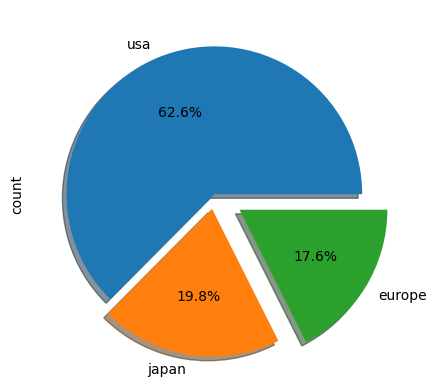

In [19]:
A.plot(kind = 'pie' , autopct = "%0.1f%%" , explode=[0 ,0.1 , 0.2 ] , shadow=True )